In [1]:
!pip3 install xgboost


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:\\Users\\Ritaja\\Downloads\\Amazon.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
df.shape

(6155, 7)

In [4]:
df.describe 

<bound method NDFrame.describe of             Date         Open         High          Low        Close  \
0     1997-05-15     2.437500     2.500000     1.927083     1.958333   
1     1997-05-16     1.968750     1.979167     1.708333     1.729167   
2     1997-05-19     1.760417     1.770833     1.625000     1.708333   
3     1997-05-20     1.729167     1.750000     1.635417     1.635417   
4     1997-05-21     1.635417     1.645833     1.375000     1.427083   
...          ...          ...          ...          ...          ...   
6150  2021-10-21  3414.250000  3440.280029  3403.000000  3435.010010   
6151  2021-10-22  3421.000000  3429.840088  3331.300049  3335.550049   
6152  2021-10-25  3335.000000  3347.800049  3297.699951  3320.370117   
6153  2021-10-26  3349.510010  3416.120117  3343.979980  3376.070068   
6154  2021-10-27  3388.000000  3412.000000  3371.453369  3396.189941   

        Adj Close    Volume  
0        1.958333  72156000  
1        1.729167  14700000  
2        1.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


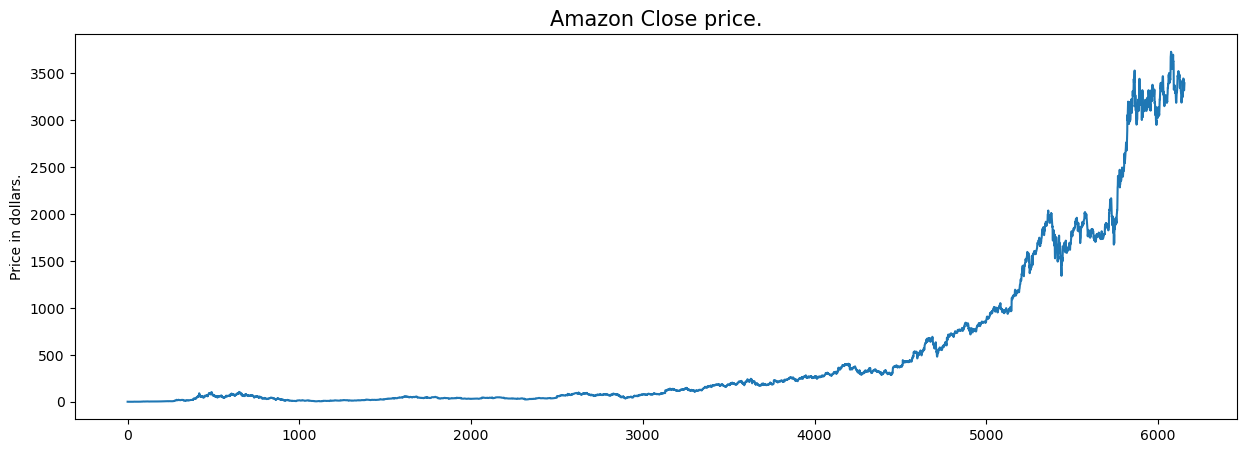

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Amazon Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df[df['Close'] == df['Adj Close']].shape


(6155, 7)

In [8]:
df = df.drop(['Adj Close'], axis=1)

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

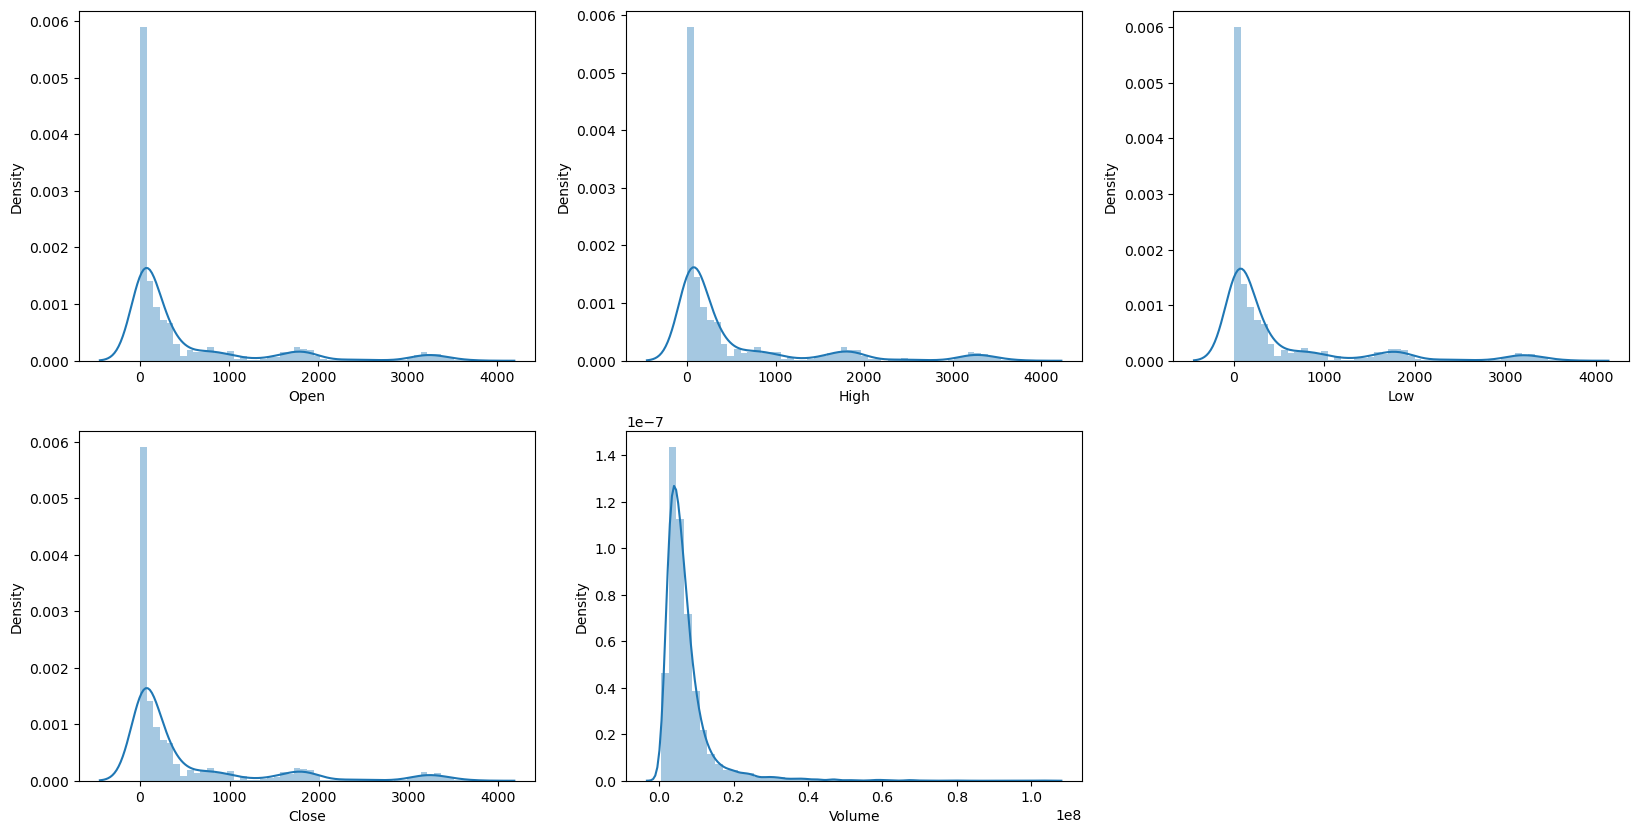

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

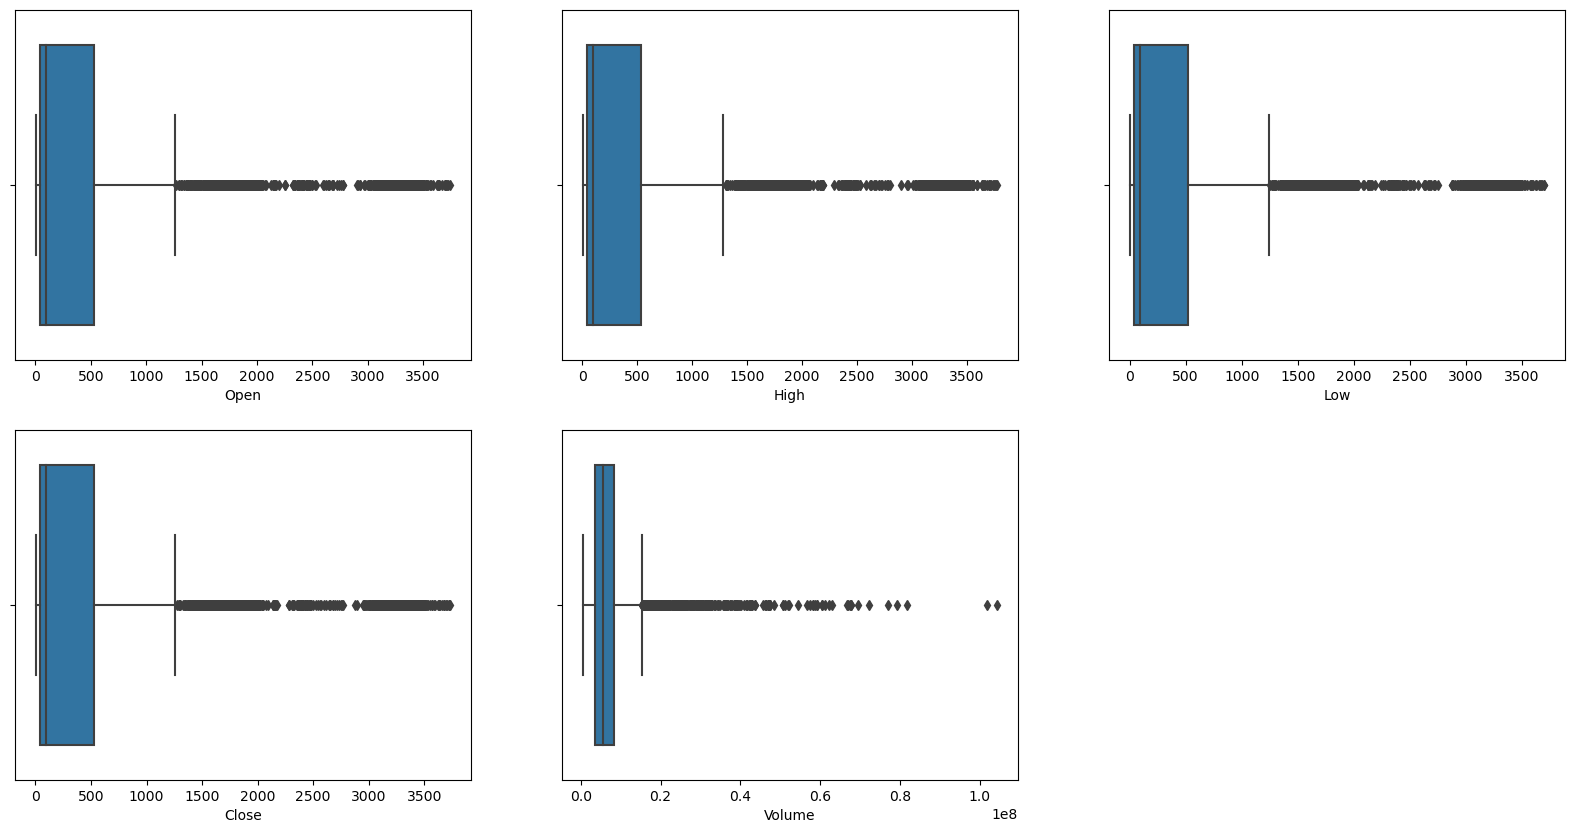

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [12]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,15,5,1997
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,16,5,1997
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,19,5,1997
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,20,5,1997
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,21,5,1997


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,15,5,1997,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,16,5,1997,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,19,5,1997,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,20,5,1997,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,21,5,1997,0


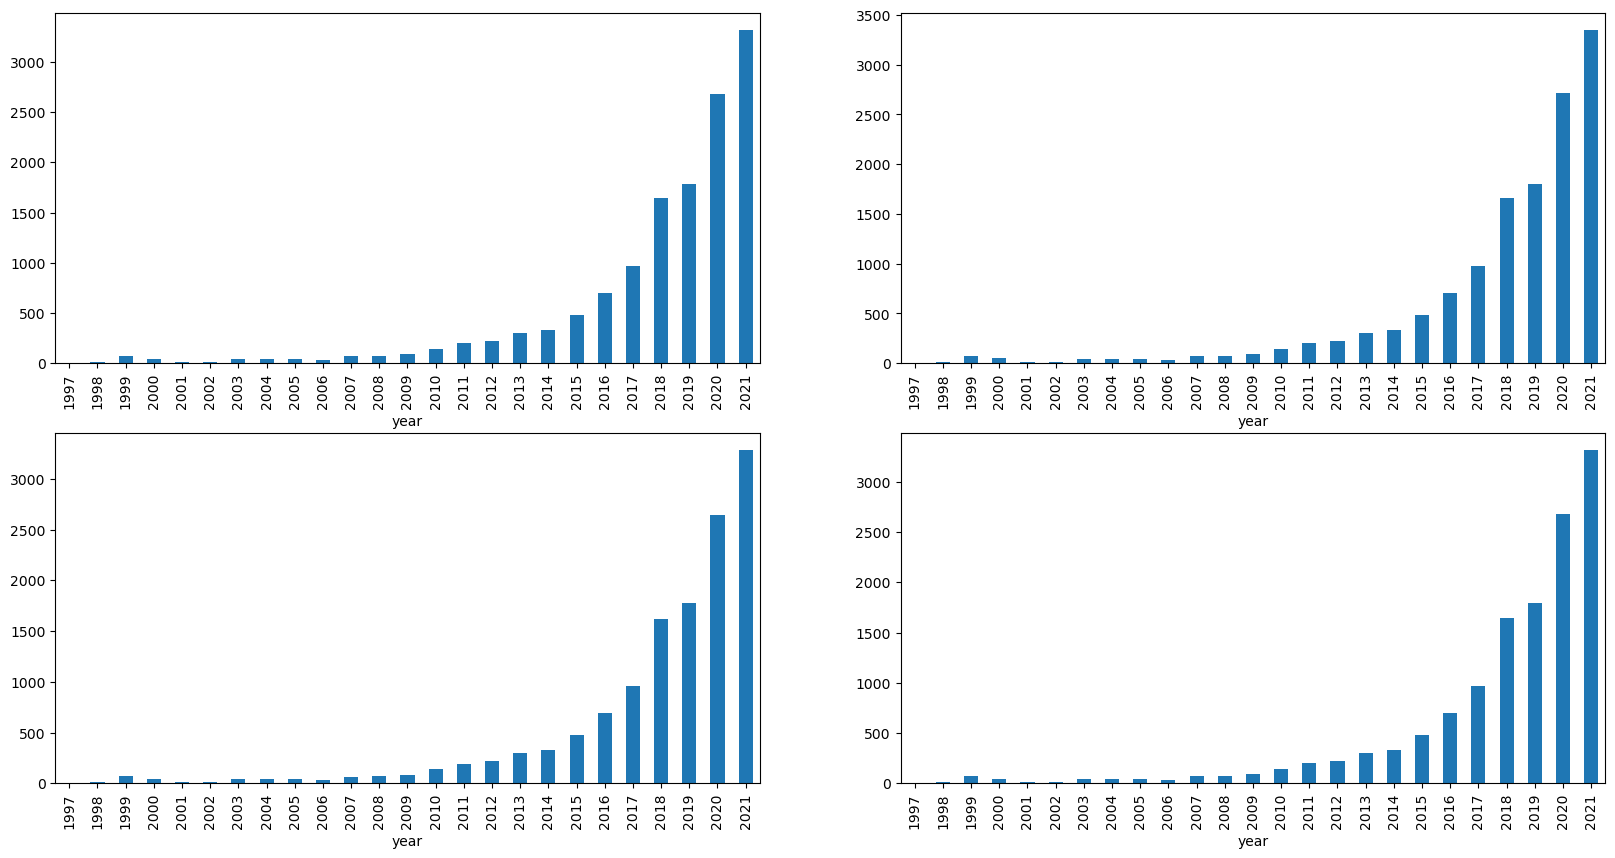

In [14]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [15]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,522.582836,528.344489,516.343316,522.563960,7.578315e+06,15.748039,6.123284,2009.144853
1,516.571599,522.031217,510.214912,516.233571,6.838810e+06,15.746988,7.438554,2008.998554


In [16]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

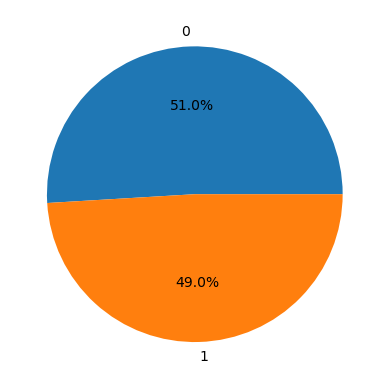

In [17]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

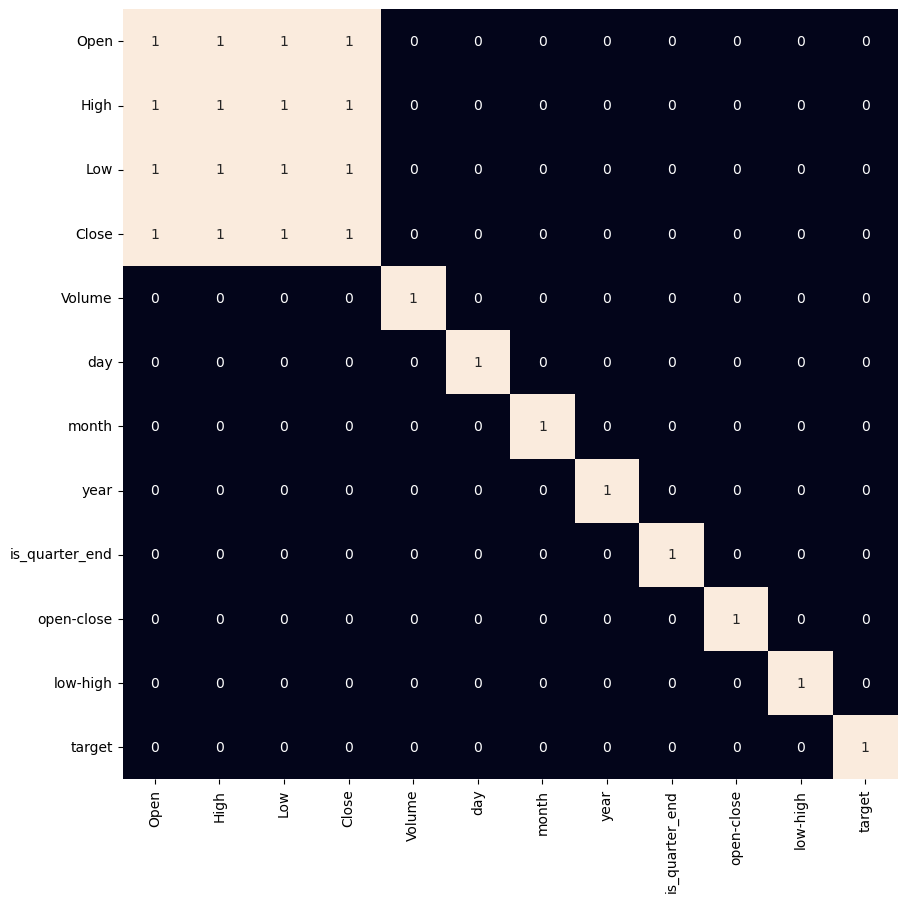

In [18]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [19]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(5539, 3) (616, 3)


In [20]:

models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5099030118272405
Validation Accuracy :  0.551041490976556

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.49979587066574077
Validation Accuracy :  0.5109208972845336

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

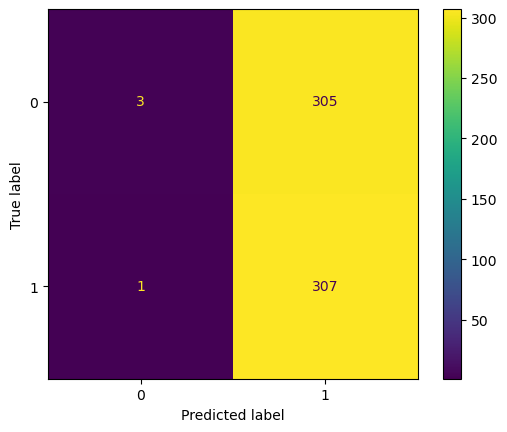

In [22]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()